이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eeniemeeniemineymoe","key":"df2e0b0813b907f4cdd957269089de28"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# PermissionWarning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d zalando-research/fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 97% 67.0M/68.8M [00:04<00:00, 21.0MB/s]
100% 68.8M/68.8M [00:04<00:00, 17.2MB/s]


In [6]:
# 압축 해제
!unzip fashionmnist.zip -d fashion_data

Archive:  fashionmnist.zip
  inflating: fashion_data/fashion-mnist_test.csv  
  inflating: fashion_data/fashion-mnist_train.csv  
  inflating: fashion_data/t10k-images-idx3-ubyte  
  inflating: fashion_data/t10k-labels-idx1-ubyte  
  inflating: fashion_data/train-images-idx3-ubyte  
  inflating: fashion_data/train-labels-idx1-ubyte  


In [7]:
train = pd.read_csv("fashion_data/fashion-mnist_train.csv")
test = pd.read_csv("fashion_data/fashion-mnist_test.csv")

###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

* 각 예제는 10개 클래스의 레이블과 관련된 28x28 그레이스케일 이미지

In [ ]:
print("Train 데이터 모양:", train.shape)
print("Train 데이터 크기:", train.size)
print("Train 데이터 결측치 여부:", train.isnull().sum().sum())
print(train.describe())
print('-------------------------------------------------------------------------------')
print("Test 데이터 모양:", test.shape)
print("Test 데이터 크기:", test.size)
print("Test 데이터 결측치 여부:", test.isnull().sum().sum())
print(test.describe())

Train 데이터 모양: (60000, 785)
Train 데이터 크기: 47100000
Train 데이터 결측치 여부: 0
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.19828

### Data중 첫 번째 이미지를 보여주세요.

In [ ]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


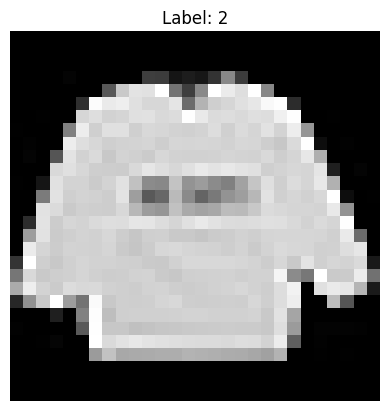

In [ ]:
# 첫 번째 이미지 데이터, 레이블 추출
first_image = train.iloc[0, 1:].values  # 픽셀 값만 선택
first_image = first_image.reshape(28, 28)  # 28x28로 변환
label = train.iloc[0, 0]  # 해당되는 레이블

plt.imshow(first_image, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 레이블과 픽셀 값을 각각 분리하여 train과 test 데이터셋에 저장
train_labels = torch.tensor(train.iloc[:, 0].values, dtype=torch.long)
train_images = torch.tensor(train.iloc[:, 1:].values, dtype=torch.float32)
test_labels = torch.tensor(test.iloc[:, 0].values, dtype=torch.long)
test_images = torch.tensor(test.iloc[:, 1:].values, dtype=torch.float32)

# TensorDataset 생성 (PyTorch 모델 학습 시 사용할 데이터셋 형식)
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

# DataLoader 생성 (배치 처리와 셔플링을 위해 사용)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [9]:
# 정규화 적용 (0-1 범위로 스케일링)
train_images = torch.tensor(train.iloc[:, 1:].values, dtype=torch.float32) / 255
test_images = torch.tensor(test.iloc[:, 1:].values, dtype=torch.float32) / 255

# 레이블 텐서 생성
train_labels = torch.tensor(train.iloc[:, 0].values, dtype=torch.long)
test_labels = torch.tensor(test.iloc[:, 0].values, dtype=torch.long)

# TensorDataset 생성 (정규화된 데이터를 사용)
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

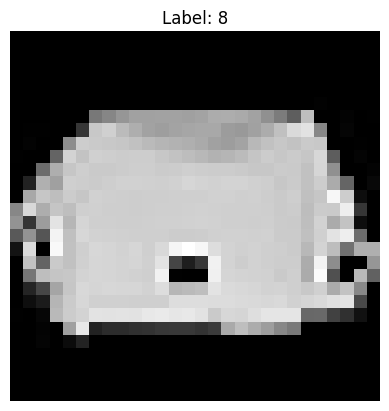

In [10]:
from torchvision import transforms

# 데이터 증강 및 정규화 파이프라인 설정
transform = transforms.Compose([
    transforms.ToTensor(),                           # Tensor로 변환
    transforms.RandomHorizontalFlip(),               # 랜덤 수평 뒤집기
    transforms.RandomRotation(10),                   # -10도에서 +10도 사이로 랜덤 회전
    transforms.ColorJitter(brightness=0.2),          # 밝기 조정
    transforms.Normalize((0.5,), (0.5,))             # 평균 0.5, 표준편차 0.5로 정규화
])

# Custom Dataset 정의
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # 이미지 데이터를 28x28 그레이스케일로 변환
        image = self.images[idx].reshape(28, 28, 1).numpy().astype(np.float32)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 전처리를 포함한 데이터셋 및 DataLoader 생성
train_dataset = CustomDataset(train_images, train_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels)  # 테스트셋에는 전처리 미적용

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 예시: 첫 번째 배치에서 첫 번째 이미지 시각화
images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze().numpy(), cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.axis("off")
plt.show()

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

**주성분 분석(PCA)**은 가장 인기 있는 차원 축소 알고리즘으로 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다. PCA는 훈련 세트에서 분산이 최대인 축을 찾는다.

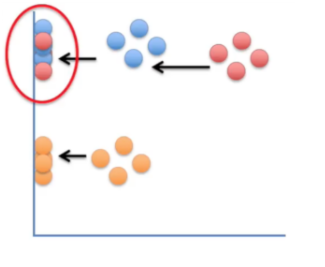


그러나 PCA의 경우 선형 분석 방식으로 값을 사상하기 때문에 차원이 감소되면서 군집화 되어 있는 데이터들이 뭉게져서 제대로 구별할 수 없는 문제를 가지고 있다.

반면 **t-sne**는 먼저 점을 하나 임의로 선택하여 이 점에서부터 다른 점까지의 거리를 측정한다. T분포 그래프를 이용하여, 선택한 점(기준점)을 T 분포상의 가운데 위치하게 하고, 기준점으로부터 상대점까지 거리에 있는 T분포의 값을 선택하여, 이 값을 친밀도(Similarity)라고 하고, 이 친밀도가 가까운 값끼리 묶는다.

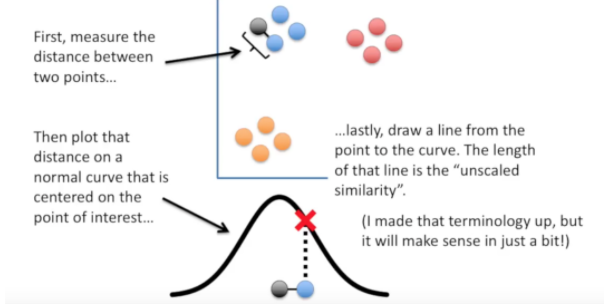


이 경우, PCA처럼 군집이 뭉게지지 않는다는 장점이 있지만, 매번 계산할 때마다 축의 위치가 바뀌므로, 다른 모양으로 나타나게 된다. 단, 데이터의 군집성과 같은 특성들은 유지가 되어 시각화를 통한 데이터 분석에서는 매우 유용하나, 매번 값이 바뀌기 때문에 머신러닝 모델의 학습 피쳐로 사용되기에는 다소 어려운 점이 존재한다.

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [11]:
from sklearn.decomposition import PCA

# PCA 모델 생성 및 50차원으로 축소
pca = PCA(n_components=50)
train_images_pca_50 = pca.fit_transform(train_images)  # 학습 데이터에 PCA 적용
test_images_pca_50 = pca.transform(test_images)        # 테스트 데이터에 PCA 적용

# PCA 결과를 텐서로 변환
train_images_pca_50 = torch.tensor(train_images_pca_50, dtype=torch.float32)
test_images_pca_50 = torch.tensor(test_images_pca_50, dtype=torch.float32)

# 확인: PCA로 축소된 데이터의 형태
print("Train images after PCA:", train_images_pca_50.shape)
print("Test images after PCA:", test_images_pca_50.shape)

Train images after PCA: torch.Size([60000, 50])
Test images after PCA: torch.Size([10000, 50])


### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [ ]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
# # 전체 설명된 분산 비율 출력
explained_variance_ratio_sum = explained_variance_ratio.sum()

print("Explained Variance Ratio for each component:", explained_variance_ratio)
print("Total Explained Variance (sum):", explained_variance_ratio_sum)

Explained Variance Ratio for each component: [0.29011353 0.17727668 0.06022699 0.04970272 0.03839289 0.03470997
 0.02344044 0.01913937 0.01343605 0.01310725 0.0098979  0.0091405
 0.00765206 0.00660427 0.00609188 0.00591506 0.00552046 0.0053049
 0.00459959 0.00455534 0.00432823 0.00406103 0.00383469 0.00374221
 0.00361877 0.0035091  0.00333586 0.00318696 0.00309619 0.00295278
 0.00276008 0.00265339 0.00262962 0.0025768  0.0024756  0.00238413
 0.00230075 0.00224349 0.00219128 0.00209739 0.00200786 0.00197572
 0.00194214 0.00183776 0.00175782 0.0017155  0.00168051 0.00163924
 0.00162221 0.00156039]
Total Explained Variance (sum): 0.8625453348084676


### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [ ]:
from sklearn.metrics import mean_squared_error

# PCA를 사용하여 원래 차원으로 복원
train_images_reconstructed = pca.inverse_transform(train_images_pca_50)

# 재구성 오차 계산 (MSE 방식)
reconstruction_error = mean_squared_error(train_images, train_images_reconstructed)
print("Reconstruction Error (MSE):", reconstruction_error)

Reconstruction Error (MSE): 0.01193957325234101


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [ ]:
# PCA 모델 생성 및 30차원으로 축소
pca = PCA(n_components=30)
train_images_pca_30 = pca.fit_transform(train_images)  # 학습 데이터에 PCA 적용

# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:", explained_variance_ratio)

# 전체 설명된 분산 비율 (누적 합계)
total_explained_variance = explained_variance_ratio.sum()
print("Total explained variance ratio (30 components):", total_explained_variance)

# PCA를 사용하여 원래 차원으로 복원
train_images_reconstructed = pca.inverse_transform(train_images_pca_30)

# 재구성 오차 계산 (MSE 방식)
reconstruction_error = mean_squared_error(train_images, train_images_reconstructed)
print("Reconstruction Error (MSE):", reconstruction_error)

Explained variance ratio for each principal component: [0.29011353 0.17727668 0.06022699 0.04970272 0.03839289 0.03470997
 0.02344044 0.01913937 0.01343605 0.01310725 0.0098979  0.0091405
 0.00765206 0.00660427 0.00609188 0.00591506 0.00552046 0.0053049
 0.00459959 0.00455534 0.00432823 0.00406103 0.00383469 0.00374221
 0.00361877 0.0035091  0.00333586 0.00318696 0.00309619 0.00295278]
Total explained variance ratio (30 components): 0.8204936617320773
Reconstruction Error (MSE): 0.01559226143414577


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

- 50차원으로 줄였을 때는 더 많은 주성분을 사용하여 30차원으로 줄였을 때보다 분산을 더 많이 보존할 수 있다. 따라서 30차원으로 줄였을 때보다 전체 설명된 분산 비율이 더 크다.

- 원본 데이터를 얼마나 잘 복원할 수 있는지를 나타내는 지표인 재구성 오차 또한 30차원으로 줄였을 때 정보가 더 많이 손실되기 때문에 재구성오차가 더 높다.

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [ ]:
# PCA 모델 생성 및 2차원으로 축소
pca = PCA(n_components=2)
train_images_pca_2 = pca.fit_transform(train_images)  # 학습 데이터에 PCA 적용

# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:", explained_variance_ratio)

# 전체 설명된 분산 비율 (누적 합계)
total_explained_variance = explained_variance_ratio.sum()
print("Total explained variance ratio (30 components):", total_explained_variance)

# PCA를 사용하여 원래 차원으로 복원
train_images_reconstructed = pca.inverse_transform(train_images_pca_2)

# 재구성 오차 계산 (MSE 방식)
reconstruction_error = mean_squared_error(train_images, train_images_reconstructed)
print("Reconstruction Error (MSE):", reconstruction_error)

Explained variance ratio for each principal component: [0.29011353 0.17727668]
Total explained variance ratio (30 components): 0.4673902181650179
Reconstruction Error (MSE): 0.046263497104816795


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

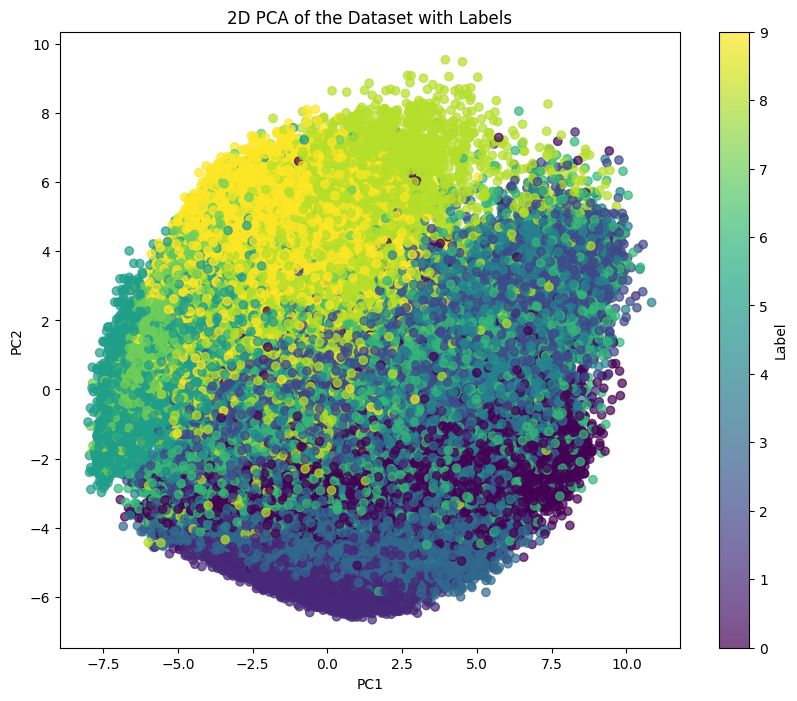

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_pca_2[:, 0], train_images_pca_2[:, 1], c=train_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of the Dataset with Labels")
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

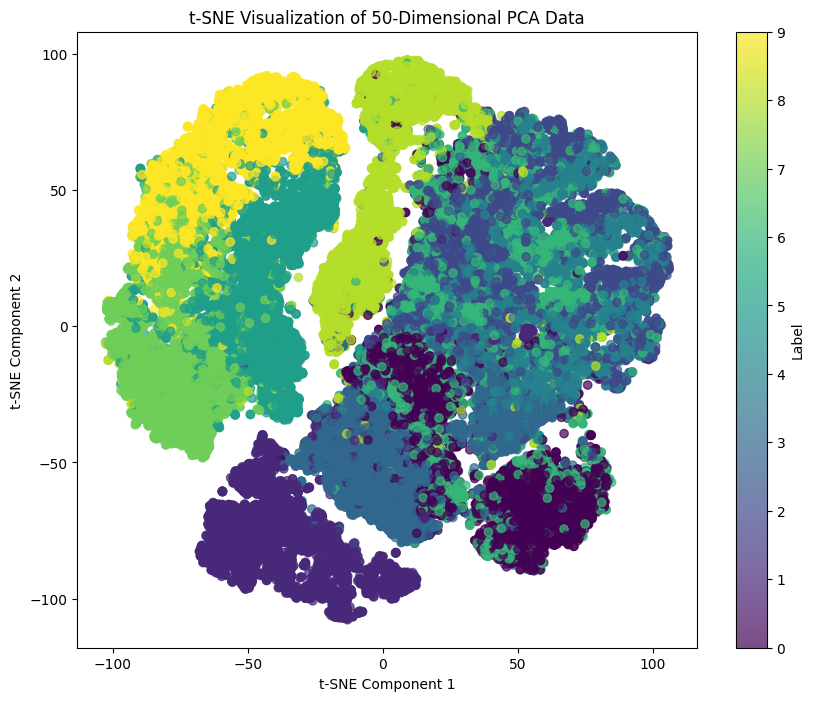

In [ ]:
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
train_images_tsne_50 = tsne.fit_transform(train_images_pca_50)  # 50차원 PCA 데이터를 t-SNE로 2차원 축소

# t-SNE로 축소된 데이터를 레이블에 따라 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne_50[:, 0], train_images_tsne_50[:, 1], c=train_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of 50-Dimensional PCA Data")
plt.show()

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

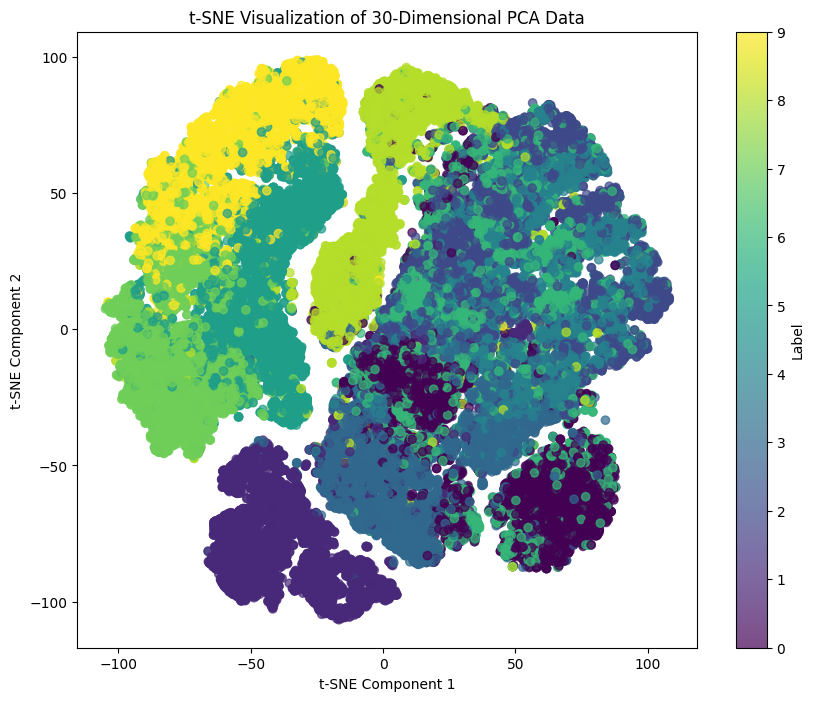

In [ ]:
# t-SNE 모델 생성 및 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
train_images_tsne_30 = tsne.fit_transform(train_images_pca_30)  # 30차원 PCA 데이터를 t-SNE로 2차원 축소

# t-SNE로 축소된 데이터를 레이블에 따라 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne_30[:, 0], train_images_tsne_30[:, 1], c=train_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of 30-Dimensional PCA Data")
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성 및 군집화 수행
dbscan = DBSCAN(eps=3, min_samples=5)  # eps와 min_samples는 데이터에 따라 조정 가능
dbscan_labels = dbscan.fit_predict(train_images_pca_50)

# 군집화 결과 확인
unique_labels = set(dbscan_labels)
print("Number of clusters found:", len(unique_labels) - (1 if -1 in dbscan_labels else 0))
print("Noise points:", list(dbscan_labels).count(-1))


Number of clusters found: 9
Noise points: 6735


### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [ ]:
from sklearn.cluster import KMeans

# K-means 모델 생성 및 군집화 수행 (군집의 개수 = 10)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(train_images_pca_50)

# 군집화 결과 확인
print("Cluster centers shape:", kmeans.cluster_centers_.shape)
print("Number of clusters:", len(set(kmeans_labels)))

Cluster centers shape: (10, 50)
Number of clusters: 10


### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

In [ ]:
!pip install kneed

Optimal number of clusters (Elbow Point): 4


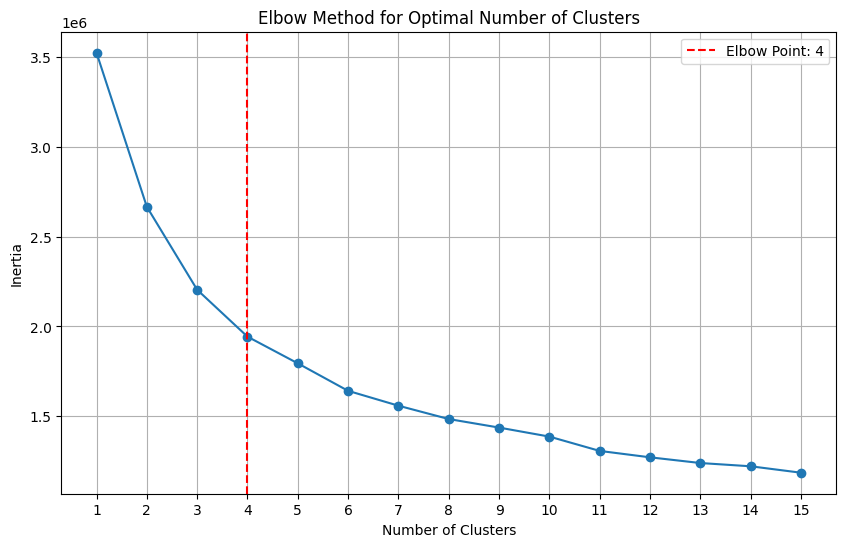

In [ ]:
from kneed import KneeLocator

# 군집 개수를 1부터 15까지 변화시키며 K-means 모델 학습 및 관성 값 계산
inertia_values = []
cluster_range = range(1, 16)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_images_pca_50)
    inertia_values.append(kmeans.inertia_)  # 관성 값 저장

# 엘보우 지점 찾기
kneedle = KneeLocator(cluster_range, inertia_values, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
print("Optimal number of clusters (Elbow Point):", optimal_k)

# 엘보우 메소드 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Elbow Point: {optimal_k}')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

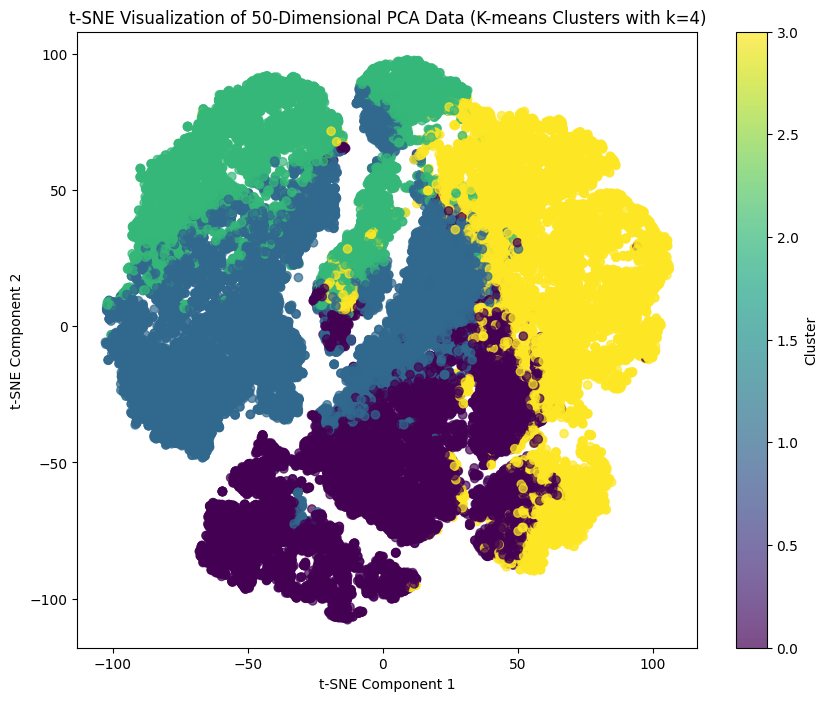

In [ ]:
# K-means 모델 생성 및 군집화 수행 (군집의 개수 = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(train_images_pca_50)  # train_images_pca_50은 50차원 PCA 데이터

# t-SNE를 사용하여 2차원으로 시각화
tsne = TSNE(n_components=2, random_state=42)
train_images_tsne = tsne.fit_transform(train_images_pca_50)

# t-SNE로 축소된 데이터를 K-means 군집 레이블에 따라 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of 50-Dimensional PCA Data (K-means Clusters with k=4)")
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

##### 1. Agglomerative Clustering (병합 군집화)
- 기본원리: 하향식 접근 방식의 군집화 기법으로 각 데이터 포인트를 개별 군집으로 시작하여, 가장 가까운 군집 쌍을 반복적으로 병합하여 전체 데이터 셋을 하나의 군집으로 통합하는 방식.

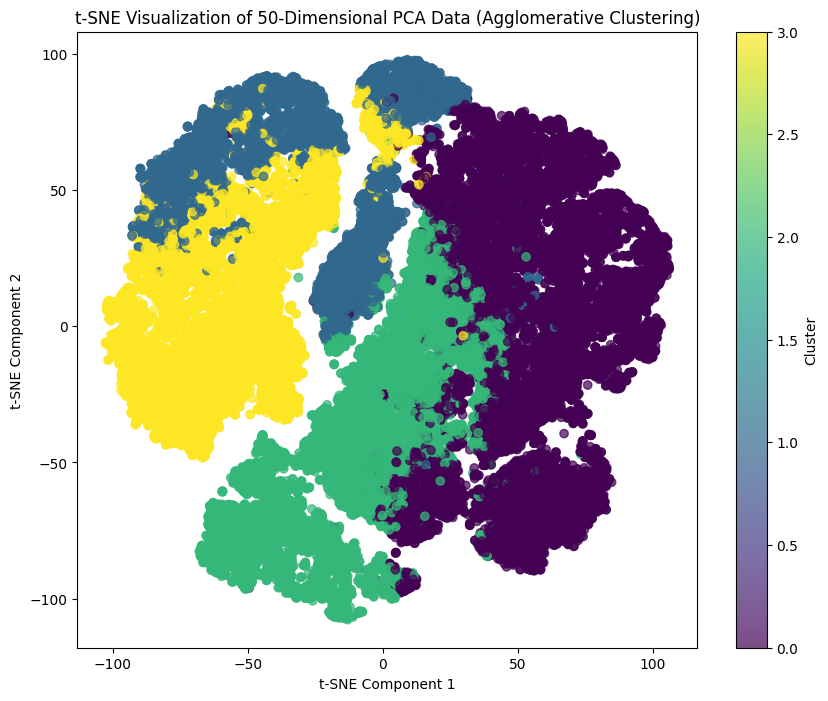

In [ ]:
from sklearn.cluster import AgglomerativeClustering, MeanShift

# 1. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(train_images_pca_50)

# t-SNE로 축소
agglo_tsne = TSNE(n_components=2, random_state=42).fit_transform(train_images_pca_50)

# Agglomerative Clustering 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(agglo_tsne[:, 0], agglo_tsne[:, 1], c=agglo_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of 50-Dimensional PCA Data (Agglomerative Clustering)")
plt.show()

##### 2. Mean Shift
- 기본원리: 데이터의 밀도를 기반으로 하는 군집화 기법으로 데이터 포인트의 밀도 분포를 추정하고, 데이터 포인트가 높은 밀도의 영역으로 이동하는 방식으로 군집을 형성

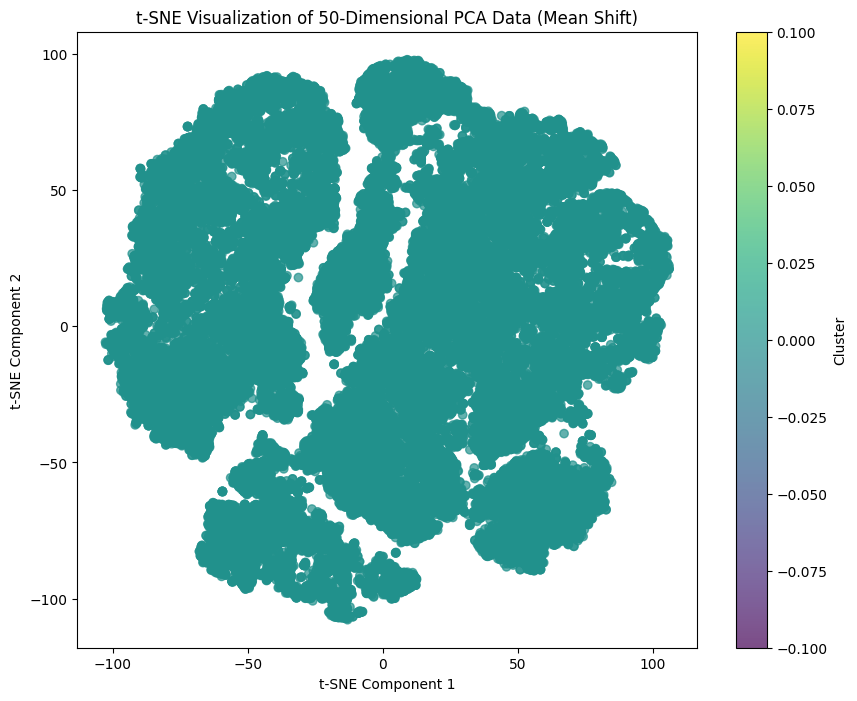

In [ ]:
# 2. Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(train_images_pca_50)

# t-SNE로 축소
mean_shift_tsne = TSNE(n_components=2, random_state=42).fit_transform(train_images_pca_50)

# Mean Shift 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(mean_shift_tsne[:, 0], mean_shift_tsne[:, 1], c=mean_shift_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of 50-Dimensional PCA Data (Mean Shift)")
plt.show()

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

- 실루엣계수는 군집화의 품질을 평가하기 위한 지표로, 각 데이터 포인트가 얼마나 잘 군집화되어 있는지를 나타냅니다. 이 계수는 각 데이터 포인트가 속한 군집과 가장 가까운 다른 군집 간의 거리를 비교하여 계산됩니다.

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(train_images_pca_50, kmeans_labels)
dbscan_silhouette = silhouette_score(train_images_pca_50, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1 # 단, 군집이 하나만 형성된 경우(-1 레이블 포함) 실루엣 점수를 -1로 설정합니다
agglo_silhouette = silhouette_score(train_images_pca_50, agglo_labels)
mean_shift_silhouette = silhouette_score(train_images_pca_50, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else -1

# 결과 출력
print("Silhouette Scores:")
print(f"K-means: {kmeans_silhouette:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f}")
print(f"Agglomerative Clustering: {agglo_silhouette:.4f}")
print(f"Mean Shift: {mean_shift_silhouette:.4f}")

# 실루엣 점수는 -1과 1 사이의 값으로, 1에 가까울수록 군집화 성능이 좋은 것을 의미

Silhouette Scores:
K-means: 0.2169
DBSCAN: -0.2521
Agglomerative Clustering: 0.1789
Mean Shift: -1.0000


* Mean Shift 시간이 오래걸림 -> 샘플링을 통해 군집화했을 때 결과와 비교

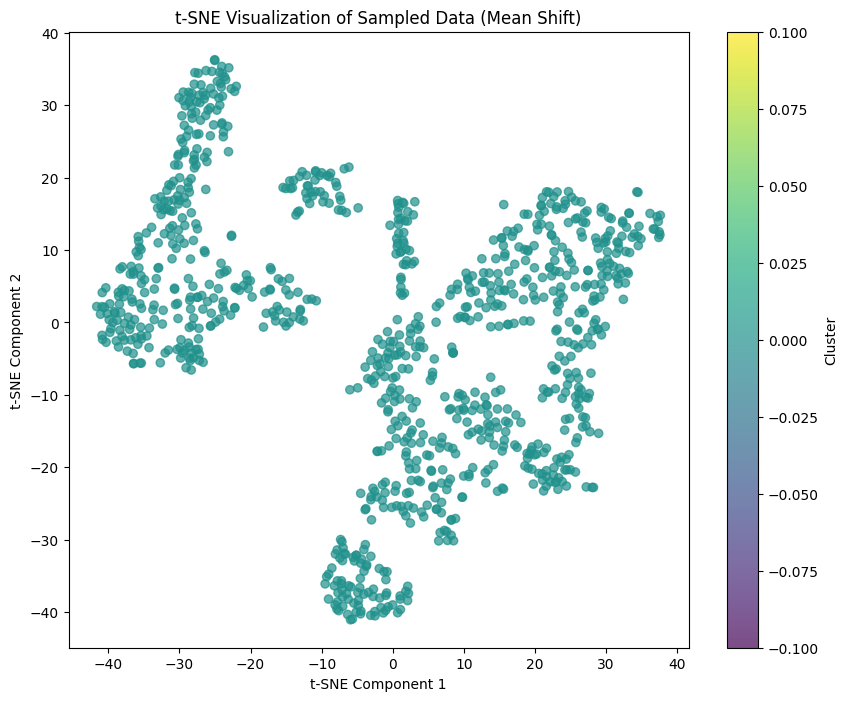

In [ ]:
# 데이터 샘플링
sample_indices = np.random.choice(train_images_pca_50.shape[0], size=1000, replace=False)
sample_data = train_images_pca_50[sample_indices]

# Mean Shift 군집화
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(sample_data)

# t-SNE로 축소
mean_shift_tsne = TSNE(n_components=2, random_state=42).fit_transform(sample_data)

# Mean Shift 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(mean_shift_tsne[:, 0], mean_shift_tsne[:, 1], c=mean_shift_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Sampled Data (Mean Shift)")
plt.show()

In [ ]:
# 데이터 샘플링
sample_indices = np.random.choice(train_images_pca_50.shape[0], size=1000, replace=False)
sample_data = train_images_pca_50[sample_indices]
sample_labels = train_labels[sample_indices]  # 샘플링한 레이블도 함께 가져옵니다.

# 1. K-means 군집화 (군집 개수 = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(sample_data)
kmeans_silhouette = silhouette_score(sample_data, kmeans_labels)

# 2. DBSCAN 군집화
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(sample_data)
dbscan_silhouette = silhouette_score(sample_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# 3. Mean Shift 군집화
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(sample_data)
mean_shift_silhouette = silhouette_score(sample_data, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else -1

# 4. Agglomerative Clustering (군집 개수 = 4)
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(sample_data)
agglo_silhouette = silhouette_score(sample_data, agglo_labels)

# 결과 출력
print("Silhouette Scores for Sampled Data:")
print(f"K-means: {kmeans_silhouette:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f}")
print(f"Agglomerative Clustering: {agglo_silhouette:.4f}")
print(f"Mean Shift: {mean_shift_silhouette:.4f}")

Silhouette Scores for Sampled Data:
K-means: 0.2135
DBSCAN: -0.2151
Agglomerative Clustering: 0.2000
Mean Shift: -1.0000


* 전체 데이터를 통해 군집화 후 실루엣 계수를 구한 것과 샘플링 후 실루엣 계수를 구한 결과가 어느정도 비슷하다.

### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.


- k-means가 비교적 높은 실루엣 점수를 기록했으나 1애 가까운 값이 아니므로 군집화 품질이 우수하다고 보기 어렵다.
- DBSCAN의 실루엣 점수는 음수로 군집화하는데 있어서 품질이 좋지 않다.
- Agglomerative Clustering은 0.17의 실루엣 점수로 DBSCAN보다는 클러스터링이 잘 되었지만 k-means보다 군집화 품질이 떨어진다.
- Mean Shift는 모든 포인트가 노이즈로 간주되었을 가능성이 크며 이 방법은 해당 데이터에 적합하지 않음을 나타낸다.

##### DBSCAN의 eps를 수정했을 때 6일 때 실루엣 계수가 가장 높게 나타남

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [12]:
sample_indices = np.random.choice(train_images_pca_50.shape[0], size=1000, replace=False)
sample_data = train_images_pca_50[sample_indices]

In [20]:
# DBSCAN 파라미터 설정
eps_value = 5
min_samples_value = 3

# DBSCAN 군집화
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(sample_data)

# 실루엣 점수 계산
dbscan_silhouette = silhouette_score(sample_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print("DBSCAN Silhouette Score with eps=5:", dbscan_silhouette)

DBSCAN Silhouette Score with eps=5: 0.0876114


In [17]:
# DBSCAN 파라미터 설정
eps_value = 6
min_samples_value = 3

# DBSCAN 군집화
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(sample_data)

# 실루엣 점수 계산
dbscan_silhouette = silhouette_score(sample_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print("DBSCAN Silhouette Score with eps=6:", dbscan_silhouette)

DBSCAN Silhouette Score with eps=6: 0.097856306


In [18]:
# DBSCAN 파라미터 설정
eps_value = 7
min_samples_value = 3

# DBSCAN 군집화
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(sample_data)

# 실루엣 점수 계산
dbscan_silhouette = silhouette_score(sample_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print("DBSCAN Silhouette Score with eps=7:", dbscan_silhouette)

DBSCAN Silhouette Score with eps=7: -1
